<a href="https://colab.research.google.com/github/deltorobarba/science/blob/main/schroedinger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="blue">**Schrödinger Equation $\hat{H}\psi = E\psi$**

In [ ]:
!pip install cirq openfermion -q
import cirq
import numpy as np

<font color="blue">**Static and Dynamic Calculations in Physics and Chemistry**

* **Model**: classical (Newton Mechanics) or quantum (Schrödinger equation):  static (time independent) or dynamic (time-dependent)
* **Computing**: Classical Computing or Quantum Computing

<font color="blue">*Newtonian Mechanics (**Static and Dynamic**): $F = m \cdot a$*
* Ignores electrons and consider atoms as spheres connected by springs (force fields)
* **Classical - Dynamic**: Molecular dynamics (MD). How proteins enfold and move? GROMACS, NAMD, AMBER.
* **Classical - Static**: Molecular Docking / Energy Minimization. Geometrically: Does medication fit to enzyme? AutoDock, Rosetta.
* **Quantum computing methods:** Future: Navier Stokes with HHL etc

<font color="blue">*Quantum Mechanics (**Static**): Time-independent Schrödinger Equation $\hat{H}|\psi\rangle = E|\psi\rangle$*
* Includes electrons. **Approximates Ground State via optimization** with variation $\delta \langle H \rangle = 0$ to find global optimum in energy landscape. Stationary state important for calculating binding energies: If $\psi$ is an eigenstate of $\hat{H}$, then time evolution is trivial: $\Psi(t) = \psi e^{-iEt/\hbar}$. Probability density $|\Psi(t)|^2$ remains constant over time = states are stationary.
* **Classical computing:** Hartree-Fock (mean field of $\psi$), DFT (electron density $\rho$), Post-HF (calculate correlation energies)
* **Quantum computing** (**NISQ**): Variational Quantum Eigensolver. Quantum Advantage: finds correlation energy with entanglement.

<font color="blue">*Quantum Mechanics (**Dynamic**): Time-dependent Schrödinger Equation $i\hbar \frac{\partial}{\partial t} \Psi(\mathbf{r}, t) = \hat{H} \Psi(\mathbf{r}, t)$*
* **Simulate Time Evolution** $e^{-i\hat{H}t}$ of Quantum State $|\Psi(t)\rangle = e^{-i\hat{H}t/\hbar} |\Psi(0)\rangle$ via Unitary Transformation. For Quantum Chaos, OTOC, Scrambling (Black Holes) reaction dynamics (observe how bonds break and reform during a collision). No forward theorem!
* **Classical computing**: Time-Dependent DFT (TD-DFT) used to classically calculate excitations (fluorescence, spectra). However only for short times and small systems. To solve the time-dependent equation $i\hbar \frac{\partial}{\partial t} \Psi = \hat{H} \Psi$ classically at scale, you have to apply operator $e^{-i\hat{H}t/\hbar}$ to wavefunction. In system with $N$ particles, complexity grows exponentially with $N$.
* **Quantum computing** (**Fault-Tolerant**): LCU, Trotterization, Qubitization (with Quantum Walks and Block Encoding).

<font color="blue">*Special Cases: Hybrid HPC and Quantum*
* **QM/MM (Quantum Mechanics / Molecular Mechanics)**: Simulate active site of an enzyme (where reaction takes place) using quantum mechanics. Large rest of protein simulated using classical physics.
* **Semi-empirical (xTB)**: Use Schrödinger equation, but replace difficult integrals with parameters derived from experiments.

> Schrödinger for Hydogen atom works analytically. A second electron add electron-electron repulsion = three-body problem. $→$ Moving to *approximate* Schrödinger with DFT and HF on classical computers via *optimization*. $→$ Even larger: *Simulate* time evolution = Quantum computer doesn't store information anymore - **it becomes the Hilbert space!**



<font color="blue">*Jordan Wigner Transform*

* Map electrons to qubits

#### <font color="blue">**Time-dependent Schrödinger Equation $i\hbar \frac{\partial}{\partial t} \Psi(\mathbf{r}, t) = \hat{H} \Psi(\mathbf{r}, t)$ (dynamic)**

<font color="blue">*OTOC*

* OTOC measures how information is "scrambled" in a quantum system. Defined as: $C(t) = \langle [\hat{W}(t), \hat{V}(0)]^\dagger [\hat{W}(t), \hat{V}(0)] \rangle$ $→$ requires to determine operator $\hat{W}(t)$. by using unitary time evolution $\hat{W}(t) = e^{iHt} \hat{W}(0) e^{-iHt}$
* Special thing: not only move forward in time ($e^{-iHt}$), but also backward again for the commutator ($e^{iHt}$). Purely time-dependent dynamics. If system is chaotic, this time evolution causes an originally local operator $\hat{W}$ to "explode" across entire system.

<font color="blue">*Quanten-Chaos*

* Quantum chaos is often defined by statistics of energy eigenvalues. Measure on quantum computer: System is run with qubitization for a time $t$. OTOC is measured. If OTOC grows exponentially ($C(t) \sim e^{\lambda t}$), Lyapunov exponent of quantum chaos is found.
* OTOCs are "thermometer" for chaos; they require rewinding and fast-forwarding the time-dependent Schrödinger equation.

<font color="blue">*Scrambling*

xxx

<font color="blue">*Trotterization*

"Holzhammer". Einfach zu verstehen, aber er erzeugt Fehler. Für lange Zeiten $t$ (die man für Chaos-Studien braucht) wird der Fehler oft zu groß, es sei denn, man wählt extrem viele Schritte.

Da $\hat{H}$ meist eine Summe aus vielen Termen ist ($\hat{H} = \sum \hat{h}_j$), nutzt man die Trotter-Suzuki-Zerlegung: $e^{-i(\hat{A}+\hat{B})t} \approx (e^{-i\hat{A}t/n}e^{-i\hat{B}t/n})^n$. Wir zerlegen den Hamilton-Operator $\hat{H}$ in kleine Teile (z. B. kinetische Energie, Kern-Elektron-Wechselwirkung).Wir übersetzen diese Teile in Quantengatter ($U = e^{-i\hat{H}\Delta t}$).Der Quantencomputer "lebt" die Dynamik einfach nach.

* $e^{-i(\hat{A}+\hat{B})t} \approx (e^{-i\hat{A}t/n}e^{-i\hat{B}t/n})^n$ ... ist die Trotter-Suzuki-Zerlegung. Das ist das Standard-Werkzeug für die Time-Evolution (Zeitabhängigkeit) auf einem Quantencomputer.
* Problem: Nicht-kommutierende OperatorenIn der Quantenmechanik ist der Hamilton-Operator $\hat{H}$ oft eine Summe aus verschiedenen Teilen, z. B. Kinetische Energie $\hat{T}$ und Potenzielle Energie $\hat{V}$. $\hat{H} = \hat{T} + \hat{V}$. Das Problem ist, dass in der Quantenwelt $\hat{T}$ und $\hat{V}$ oft nicht kommutieren ($\hat{T}\hat{V} \neq \hat{V}\hat{T}$). Deshalb gilt mathematisch: $e^{-i(\hat{T}+\hat{V})t} \neq e^{-i\hat{T}t} \cdot e^{-i\hat{V}t}$. Man darf die Exponentialfunktion einer Summe von Operatoren also nicht einfach in ein Produkt von Exponentialfunktionen aufspalten, wie man es bei normalen Zahlen tut.
* Lösung: Die Trotter-ZerlegungWenn wir die Zeit $t$ in sehr viele winzige Schritte $\Delta t = t/n$ zerlegen, wird der Fehler der Aufspaltung vernachlässigbar klein.Wir wenden für einen winzigen Moment nur $\hat{T}$ an.Dann für einen winzigen Moment nur $\hat{V}$.Das wiederholen wir $n$-mal.
* Warum ist das für den Quantencomputer so wichtig? Ein Quantencomputer kann nicht "einfach so" die gesamte Energie-Matrix potenzieren. Er kann aber sehr gut einzelne Gatter ausführen.$e^{-i\hat{T}\Delta t}$ entspricht einer bestimmten Folge von Quantengattern (z.B. Rotationen).$e^{-i\hat{V}\Delta t}$ entspricht einer anderen Folge.Durch die Trotter-Zerlegung "stückeln" wir die komplexe Zeitentwicklung der Schrödinger-Gleichung in eine lange Kette von elementaren Gattern, die die Hardware versteht.


In [2]:
# Trotterization (Trotter-Suzuki)
def generate_trotter_step(qubits, dt):
    """
    Generator für einen einzelnen Trotter-Schritt.
    Yieldet die Operationen für den Hamiltonian H = ZZ + X
    """
    n = len(qubits)

    # 1. Interaktions-Terme (ZZ-Interaktion)
    # e^(-i * Z * Z * dt)
    # Cirq hat hierfür keine nativen "Parameter" wie Qiskit,
    # daher bauen wir es explizit: CNOT -> Rz -> CNOT
    for i in range(n - 1):
        yield cirq.CNOT(qubits[i], qubits[i+1])
        yield cirq.rz(rads=2 * dt).on(qubits[i+1])
        yield cirq.CNOT(qubits[i], qubits[i+1])

    # 2. Feld-Terme (X-Feld)
    # e^(-i * X * dt) -> entspricht Rx(2 * dt)
    for i in range(n):
        yield cirq.rx(rads=2 * dt).on(qubits[i])

def build_trotter_circuit(num_qubits, time, steps):
    qubits = cirq.LineQubit.range(num_qubits)
    circuit = cirq.Circuit()

    dt = time / steps

    # Wir loopen über die Schritte und fügen die Operationen hinzu
    for _ in range(steps):
        circuit.append(generate_trotter_step(qubits, dt))

    return circuit

# --- Parameter ---
num_qubits = 2
simulation_time = 1.0
trotter_steps = 3

# --- Ausführung ---
circuit = build_trotter_circuit(num_qubits, simulation_time, trotter_steps)

print(f"Cirq Trotter-Circuit ({trotter_steps} Schritte):")
print(circuit)

Cirq Trotter-Circuit (3 Schritte):
0: ───@────────────────@───Rx(0.212π)───@────────────────@───Rx(0.212π)───@────────────────@───Rx(0.212π)───
      │                │                │                │                │                │
1: ───X───Rz(0.212π)───X───Rx(0.212π)───X───Rz(0.212π)───X───Rx(0.212π)───X───Rz(0.212π)───X───Rx(0.212π)───


In [3]:
import cirq
import numpy as np
from collections import Counter

# --- 1. Wiederholung: Circuit Bauen (wie zuvor) ---
def generate_trotter_step(qubits, dt):
    n = len(qubits)
    # ZZ Interaktion
    for i in range(n - 1):
        yield cirq.CNOT(qubits[i], qubits[i+1])
        yield cirq.rz(rads=2 * dt).on(qubits[i+1])
        yield cirq.CNOT(qubits[i], qubits[i+1])
    # X Feld
    for i in range(n):
        yield cirq.rx(rads=2 * dt).on(qubits[i])

def build_circuit(num_qubits, time, steps):
    qubits = cirq.LineQubit.range(num_qubits)
    circuit = cirq.Circuit()
    dt = time / steps
    for _ in range(steps):
        circuit.append(generate_trotter_step(qubits, dt))
    return circuit, qubits

# Parameter
num_qubits = 2
simulation_time = 1.0
trotter_steps = 3

# Circuit erstellen
circuit, qubits = build_circuit(num_qubits, simulation_time, trotter_steps)

# --- 2. Simulation Typ A: Exakte Wellenfunktion (Theorie) ---
# Wir machen das VOR der Messung, da eine Messung die Wellenfunktion kollabieren würde.
simulator = cirq.Simulator()
result_sim = simulator.simulate(circuit)

print("--- Exakte theoretische Endzustände (Amplituden) ---")
print(result_sim.final_state_vector)
print("\nWahrscheinlichkeiten pro Zustand:")
# Wir berechnen |amplitude|^2
probs = np.abs(result_sim.final_state_vector)**2
for i, p in enumerate(probs):
    # Formatierung als Binärstring (z.B. 00, 01)
    state_str = format(i, f'0{num_qubits}b')
    print(f"|{state_str}> : {p:.4f} ({p*100:.1f}%)")


# --- 3. Simulation Typ B: Sampling (Wie ein echter Quantencomputer) ---
# Jetzt fügen wir Messungen am Ende des Circuits hinzu
circuit.append(cirq.measure(*qubits, key='result'))

# Wir führen das Experiment 1000 mal aus (shots)
repetitions = 1000
result_run = simulator.run(circuit, repetitions=repetitions)

# Ergebnisse auslesen
counts = result_run.histogram(key='result')

print(f"\n--- Sampling Ergebnisse (nach {repetitions} Shots) ---")
print(f"Rohe Daten (Zustand: Anzahl): {counts}")

# Schöne Darstellung der Verteilung
print("\nVerteilung:")
for state_int, count in sorted(counts.items()):
    state_bin = format(state_int, f'0{num_qubits}b')
    percentage = count / repetitions * 100
    bar = "#" * int(percentage / 2) # Einfacher ASCII-Balken
    print(f"|{state_bin}>: {count:4d} ({percentage:5.1f}%) {bar}")

--- Exakte theoretische Endzustände (Amplituden) ---
[-0.02467462-0.5757892j  -0.12200285-0.35235128j -0.12200289-0.35235122j
 -0.56497693+0.26568183j]

Wahrscheinlichkeiten pro Zustand:
|00> : 0.3321 (33.2%)
|01> : 0.1390 (13.9%)
|10> : 0.1390 (13.9%)
|11> : 0.3898 (39.0%)

--- Sampling Ergebnisse (nach 1000 Shots) ---
Rohe Daten (Zustand: Anzahl): Counter({3: 391, 0: 314, 1: 157, 2: 138})

Verteilung:
|00>:  314 ( 31.4%) ###############
|01>:  157 ( 15.7%) #######
|10>:  138 ( 13.8%) ######
|11>:  391 ( 39.1%) ###################


Berechne Zeitentwicklung...


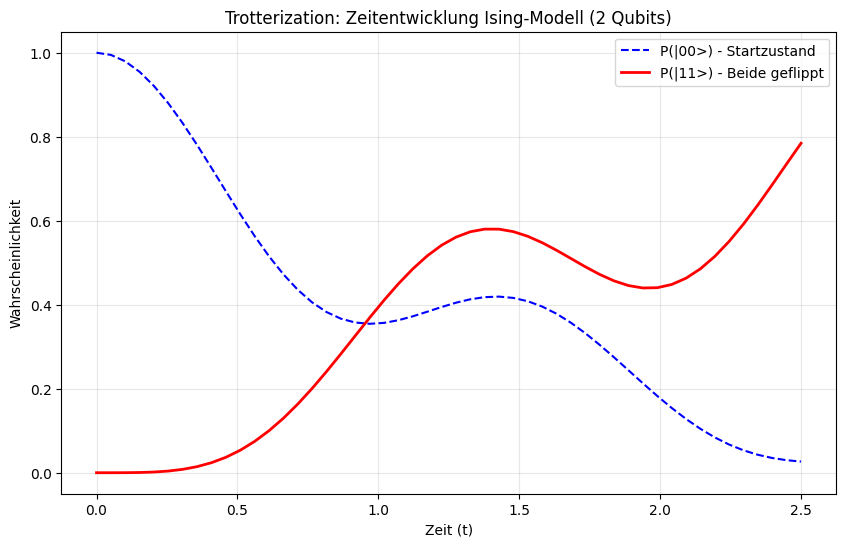

In [4]:
import cirq
import numpy as np
import matplotlib.pyplot as plt

def generate_trotter_step(qubits, dt):
    """Generiert einen einzelnen Trotter-Schritt (wie zuvor)."""
    n = len(qubits)
    # ZZ Interaktion
    for i in range(n - 1):
        yield cirq.CNOT(qubits[i], qubits[i+1])
        yield cirq.rz(rads=2 * dt).on(qubits[i+1])
        yield cirq.CNOT(qubits[i], qubits[i+1])
    # X Feld
    for i in range(n):
        yield cirq.rx(rads=2 * dt).on(qubits[i])

def get_probability_for_state(target_state_index, time, steps=10):
    """
    Baut den Circuit für eine spezifische Zeit t und gibt
    die Wahrscheinlichkeit des Zielzustands zurück.
    """
    qubits = cirq.LineQubit.range(2)
    circuit = cirq.Circuit()

    # Schutz vor Division durch Null bei t=0
    if time == 0:
        return 0.0 if target_state_index != 0 else 1.0

    dt = time / steps

    # Circuit bauen
    for _ in range(steps):
        circuit.append(generate_trotter_step(qubits, dt))

    # Simulation (Wellenfunktion)
    simulator = cirq.Simulator()
    result = simulator.simulate(circuit)

    # Amplitude des Zielzustands holen und quadrieren (|a|^2)
    amplitude = result.final_state_vector[target_state_index]
    return np.abs(amplitude)**2

# --- Konfiguration der Simulation ---
time_points = np.linspace(0, 2.5, 50)  # Von t=0 bis t=2.5 in 50 Schritten
prob_11 = []     # Hier speichern wir die Wahrscheinlichkeiten für |11>
prob_00 = []     # Hier speichern wir die Wahrscheinlichkeiten für |00>

print("Berechne Zeitentwicklung...")

# --- Hauptschleife ---
for t in time_points:
    # Zustand |11> ist Index 3 (binär 11)
    p11 = get_probability_for_state(target_state_index=3, time=t, steps=10)
    # Zustand |00> ist Index 0 (binär 00)
    p00 = get_probability_for_state(target_state_index=0, time=t, steps=10)

    prob_11.append(p11)
    prob_00.append(p00)

# --- Plotten ---
plt.figure(figsize=(10, 6))
plt.plot(time_points, prob_00, label='P(|00>) - Startzustand', color='blue', linestyle='--')
plt.plot(time_points, prob_11, label='P(|11>) - Beide geflippt', color='red', linewidth=2)

plt.title('Trotterization: Zeitentwicklung Ising-Modell (2 Qubits)')
plt.xlabel('Zeit (t)')
plt.ylabel('Wahrscheinlichkeit')
plt.ylim(-0.05, 1.05)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

<font color="blue">*LCU (Linear Combination of Unitaries)*

* The propagator $e^{-iHt}$ is decomposed into a sum of simpler unitary operations. This is more precise than Trotter, but often requires additional qubits (ancillas).

<font color="blue">*Qubitization (with Quantum Walks)*

"Goldstandard". Hier bildet man den Hamilton-Operator auf einen Quantum Walk (einen diskreten Schritt-Operator) ab. Der Clou: Die Präzision ist extrem hoch und die Kosten (Gatteranzahl) wachsen oft nur linear mit der Zeit $t$. Für die Untersuchung von Quantenchaos, wo es auf feinste Details der Energieabstände ankommt, ist das die bevorzugte Methode.

* Theorie: Eine Erklärung, wie man den Hamiltonian $\hat{H}$ in eine Summe von Unitaries (LCU) zerlegt, das Block Encoding baut und daraus den Walk Operator $Q$ konstruiert.
* Formeln: Insbesondere der Zusammenhang $\hat{H} = \sum \alpha_l U_l$ und wie die Eigenwerte von $Q$ ($e^{\pm i \theta}$) mit der Energie zusammenhängen ($\cos(\theta) \propto E$).
* Code: Eine Simulation mit numpy für einen einfachen Hamiltonian ($H = 0.6X + 0.8Z$). Der Code baut die Matrizen PREPARE, SELECT und den Walk-Operator $Q$ explizit auf und beweist, dass die Phasen von $Q$ exakt die Energien von $H$ reproduzieren.

**Zusammenhang**
* Take an operator: in Qubitization you can use the Dirac Operator (or Laplace operator) or the Hamiltonian, or another
  * (Der Dirac-Operator hat eine mathematische Struktur (eine Summe von Pauli-Matrizen, ähnlich wie Spinketten), die sich extrem gut für Block Encoding (mittels LCU - Linear Combination of Unitaries) eignet. Er ist quasi das "Musterbeispiel", an dem man die Technik oft erklärt.=
* The Operators are then packed via Block Encoding
* And then you apply Qubitization an, um die Energien zu finden.


#### <font color="blue">**Time-independent Schrödinger Equation $\hat{H}\psi = E\psi$ (static)**

In [ ]:
# @title Quantum Variational Eigensolver: Ground State Calculation with UCCSD
import numpy as np
import scipy.optimize
import itertools
import cirq
from openfermion import MolecularData, FermionOperator
from openfermion.transforms import get_fermion_operator, jordan_wigner
from openfermion.linalg import get_sparse_operator
from openfermionpyscf import run_pyscf
from pyscf import scf, dft, gto

# ==========================================
# 0. CONFIGURATION SWITCH
# ==========================================

# Choose your Ansatz here: 'UCCSD' or 'HEA' (Hardware Efficient, np.zeros + 0.01 initialization)
ANSATZ_TYPE = 'UCCSD'

# ==========================================
# 1. Classical Benchmarks (HF & DFT)
# ==========================================

print("="*50)
print(f"Ground State Calculation for {molecule}")
print("="*50)

print("\n--- Classical Benchmarks ---")

# Hartree-Fock
mf_hf = scf.RHF(mol)
mf_hf.verbose = 0
hf_energy = mf_hf.kernel()
print(f"Hartree-Fock Energy: {hf_energy:.6f} Ha")

# DFT (B3LYP)
mf_dft = dft.RKS(mol)
mf_dft.xc = 'B3LYP'
mf_dft.verbose = 0
dft_energy = mf_dft.kernel()
print(f"DFT (B3LYP) Energy:  {dft_energy:.6f} Ha")
print("-" * 30)

# ==========================================
# 2. Dynamic Bridge & Helpers
# ==========================================

def get_hamiltonian_from_mole(mol):
    """Bridging function: PySCF Mol -> OpenFermion QubitOperator"""
    n_atoms = mol.natm
    basis = mol.basis
    multiplicity = mol.spin + 1
    charge = mol.charge

    print(f"-> Bridging Molecule: {n_atoms} atoms, Basis: {basis}, Multiplicity: {multiplicity}")

    symbols = [mol.atom_symbol(i) for i in range(n_atoms)]
    coords = mol.atom_coords(unit='Angstrom')
    geometry = [[symbols[i], list(coords[i])] for i in range(n_atoms)]

    molecule_data = MolecularData(geometry, basis, multiplicity, charge)
    molecule_data = run_pyscf(molecule_data, run_scf=True)

    mh = molecule_data.get_molecular_hamiltonian()
    fh = get_fermion_operator(mh)
    qubit_hamiltonian = jordan_wigner(fh)

    return qubit_hamiltonian, molecule_data.n_qubits, molecule_data.n_electrons

def get_uccsd_excitations(n_orbitals, n_electrons):
    """Generates indices for Single and Double excitations."""
    occupied_indices = range(n_electrons)
    virtual_indices = range(n_electrons, n_orbitals)

    single_excitations = []
    double_excitations = []

    for i in occupied_indices:
        for a in virtual_indices:
            single_excitations.append((i, a))

    for i, j in itertools.combinations(occupied_indices, 2):
        for a, b in itertools.combinations(virtual_indices, 2):
            double_excitations.append((i, j, a, b))

    return single_excitations, double_excitations

# ==========================================
# 3. Ansatz Constructions
# ==========================================

def create_hea_ansatz(qubits, n_electrons, params):
    """Hardware Efficient Ansatz"""
    circuit = cirq.Circuit()
    # Init HF
    for i in range(n_electrons): circuit.append(cirq.X(qubits[i]))

    n_q = len(qubits)
    param_idx = 0

    # Layer 1: Ry
    for q in qubits:
        circuit.append(cirq.ry(params[param_idx])(q))
        param_idx += 1
    # Layer 2: CNOT
    for i in range(n_q - 1):
        circuit.append(cirq.CNOT(qubits[i], qubits[i+1]))
    # Layer 3: Ry
    for q in qubits:
        circuit.append(cirq.ry(params[param_idx])(q))
        param_idx += 1

    return circuit

def create_uccsd_ansatz(qubits, n_electrons, params, excitations):
    """
    Unitary Coupled Cluster Singles and Doubles (UCCSD) Ansatz.
    """
    circuit = cirq.Circuit()

    # 1. Initial State: Hartree-Fock
    for i in range(n_electrons):
        circuit.append(cirq.X(qubits[i]))

    # 2. Evolutions for Excitations
    param_idx = 0

    for exc in excitations:
        theta = params[param_idx]

        # Generator Construction
        if len(exc) == 2: # Single: i -> a
            i, a = exc
            generator = FermionOperator(((a, 1), (i, 0)), 1.0) - \
                        FermionOperator(((i, 1), (a, 0)), 1.0)
        elif len(exc) == 4: # Double: i,j -> a,b
            i, j, a, b = exc
            generator = FermionOperator(((b, 1), (a, 1), (j, 0), (i, 0)), 1.0) - \
                        FermionOperator(((i, 1), (j, 1), (a, 0), (b, 0)), 1.0)

        # Jordan-Wigner & Evolution
        qubit_generator = jordan_wigner(generator)
        for term, coeff in qubit_generator.terms.items():
            # Map to Cirq Pauli String
            pauli_map = {'X': cirq.X, 'Y': cirq.Y, 'Z': cirq.Z}
            qubit_pauli_map = {qubits[idx]: pauli_map[p_str] for idx, p_str in term}
            pauli_string = cirq.PauliString(qubit_pauli_map)

            # --- FIX FOR MODERN CIRQ ---
            # We want exp(theta * coeff * P).
            # Since generator is anti-hermitian, coeff is imaginary.
            # Cirq's P**t implements exp(i * pi * t * P).
            # We match the exponents: i * pi * t = theta * coeff
            # t = (theta * coeff.imag) / pi

            exponent = (theta * coeff.imag) / np.pi
            circuit.append(pauli_string ** exponent)

        param_idx += 1

    return circuit

# ==========================================
# 4. Cost Function & VQE Execution
# ==========================================

print("\n--- Starting VQE Calculation ---")
print(f"Method Selected: {ANSATZ_TYPE}")

# A. Setup System
qubit_hamiltonian, n_qubits, n_electrons = get_hamiltonian_from_mole(mol)
n_orbitals = n_qubits
n_spatial = n_qubits // 2
print(f"System: {n_qubits} Qubits, {n_electrons} Electrons, {n_spatial} Spatial Orbitals")

qubits = [cirq.LineQubit(i) for i in range(n_qubits)]
simulator = cirq.Simulator()

# B. Determine Parameters and Excitations
excitations = []
num_params = 0

if ANSATZ_TYPE == 'UCCSD':
    singles, doubles = get_uccsd_excitations(n_qubits, n_electrons)
    excitations = singles + doubles
    num_params = len(excitations)
    print(f"UCCSD Excitations: {len(singles)} Singles, {len(doubles)} Doubles")

    # UCCSD works best starting near zero (Hartree-Fock)
    initial_params = np.zeros(num_params) + 0.01

elif ANSATZ_TYPE == 'HEA':
    # 2 layers of rotations * n_qubits
    num_params = 2 * n_qubits
    print(f"HEA Parameters: {num_params}")

    # HEA works best with Random initialization
    initial_params = np.random.uniform(0, 2*np.pi, num_params)

print(f"Total Parameters to optimize: {num_params}")

# C. Optimization Loop
def cost_function(params):
    if ANSATZ_TYPE == 'UCCSD':
        circuit = create_uccsd_ansatz(qubits, n_electrons, params, excitations)
    else:
        circuit = create_hea_ansatz(qubits, n_electrons, params)

    result = simulator.simulate(circuit)
    state_vector = result.final_state_vector
    sparse_H = get_sparse_operator(qubit_hamiltonian)
    return np.vdot(state_vector, sparse_H.dot(state_vector)).real

print("Optimizing... (This may take longer for UCCSD)")
res = scipy.optimize.minimize(
    cost_function,
    initial_params,
    method='COBYLA',
    options={'maxiter': 3000, 'tol': 1e-6}
)

vqe_energy = res.fun
print(f"VQE Optimized Energy: {vqe_energy:.6f} Ha")

# ==========================================
# 5. Final Comparison
# ==========================================

print("\n--- Final Results Comparison ---")
print(f"Hartree-Fock: {hf_energy:.6f} Ha")
print(f"DFT (B3LYP):  {dft_energy:.6f} Ha")
print(f"VQE ({ANSATZ_TYPE}):   {vqe_energy:.6f} Ha")
print(f"Difference (VQE - HF): {vqe_energy - hf_energy:.6f} Ha")

Ground State Calculation for Hydrogen (H₂)

--- Classical Benchmarks ---
Hartree-Fock Energy: -1.116759 Ha
DFT (B3LYP) Energy:  -1.165418 Ha
------------------------------

--- Starting VQE Calculation ---
Method Selected: UCCSD
-> Bridging Molecule: 2 atoms, Basis: sto-3g, Multiplicity: 1
System: 4 Qubits, 2 Electrons, 2 Spatial Orbitals
UCCSD Excitations: 4 Singles, 1 Doubles
Total Parameters to optimize: 5
Optimizing... (This may take longer for UCCSD)
VQE Optimized Energy: -1.137284 Ha

--- Final Results Comparison ---
Hartree-Fock: -1.116759 Ha
DFT (B3LYP):  -1.165418 Ha
VQE (UCCSD):   -1.137284 Ha
Difference (VQE - HF): -0.020525 Ha


**Feasiblity (Qubit Count):**
* H₂ (STO-3G): 2 atoms × 1 orbital each × 2 spins = **4 Qubits** (Fast)
* H₂ (6-31G): 2 atoms × 2 orbitals each × 2 spins = **8 Qubits**  (Fast)
* H₂O (STO-3G): (2 H + 1 O) orbitals ... = **~14 Qubits** (Medium)
* O₂ (STO-3G): **~20 Qubits** (Slow)

**Circuit Structure**
* **Circuit Width (Qubit Count)**: In quantum chemistry, **1 Qubit = 1 Spin-Orbital**. Therefore, the number of spatial orbitals is exactly half the number of qubits. In the code, qubit count scales automatically based on the **basis set** (`sto-3g`, `6-31g`, etc.) and the **number of atoms**. The code handles qubit count automatically because `get_hamiltonian_from_mole` reads basis size directly.

* **Circuit Depth** is fixed in the code, defined by one block of entanglers (CNOTs) sandwiched by rotations. For very complex molecules (strongly correlated systems), this simple structure might be too shallow to capture the complex physics. One would need to repeat the `Ry -> CNOT -> Ry` layers multiple times (e.g., `depth=3` or `depth=5`) to get an accurate result.

**Baseline Methods**

* The baseline calculation is **Hartree-Fock**, a "Mean Field" approximation. It assumes electrons see each other as a static cloud of charge and ignores electron correlation (energy).

* The perfect solution is given by running a **Full CI (Correlation Interaction)** calculation. It diagonalizes the Hamiltonian directly (without a quantum circuit) to give the mathematically exact answer for this basis set. It considers also correlation energy.

**Ansatz**
* Choose **HEE** for Hardware Efficient Ansatz. It uses Rotation + CNOTs gates plus an optimizer from a given initialization. This can be either random. The code uses 'np.zeros + 0.01' initialization as a better starting point. It often suffers from "Barren Plateaus" (where the optimizer gets stuck) as the system gets larger.
* Choose **UCCSD** for Unitary Coupled Cluster. It is theoretically superior as it specifically targets the electron correlations (excitations). UCCSD is usually the better ansatz. It is physically derived from the Cluster Operator $e^{T - T^\dagger}$ and systematically excites electrons from occupied to unoccupied orbitals (Singles and Doubles excitations). It is chemically accurate and respects symmetries (number of electrons, spin, etc.). But it generates huge circuits (thousands of gates) that are very slow to simulate and impossible to run on current real hardware without error correction.


**Interpretation**

The quantum calculation is usually *lower* than Hartree-Fock. The difference (e.g. `-0.0205 Ha`) is exactly the **Correlation Energy** of a molecule.  The rotation and entanglement gates (CNOTs) are used to capture quantum mechanical behavior that Hartree-Fock ignores.



*Quantum Chemistry with Classical Computing*

In [ ]:
!pip install pyscf geometric periodictable qutip cirq openfermion openfermionpyscf -q
import numpy as np
import matplotlib.pyplot as plt
from pyscf import gto, scf, hessian, dft, tddft, mp, cc
from pyscf.geomopt.geometric_solver import optimize
import scipy.optimize
import cirq
from openfermion import MolecularData
from openfermion.transforms import get_fermion_operator, jordan_wigner
from openfermion.linalg import get_sparse_operator
from openfermionpyscf import run_pyscf

In [ ]:
# Hydrogen (H₂)
mol = gto.Mole()
mol.atom = '''
    H  0.00 0.00  0.00
    H  0.00 0.00  0.74
'''
molecule = 'Hydrogen (H₂)'

In [ ]:
# Oxygen (O₂)
mol = gto.Mole()
mol.atom = '''
    O  0.00 0.00  0.00
    O  0.00 0.00  1.21
'''
molecule = 'Oxygen (O₂)'

In [ ]:
# Water (H₂O)
mol = gto.Mole()
mol.atom = '''
    O  0.000000  0.000000  0.000000
    H  0.000000  0.757000  0.586000
    H  0.000000 -0.757000  0.586000
'''
molecule = 'Water (H₂O)'

In [ ]:
# Build molecule (with gto.M() function)
mol.atom = mol.atom
mol.basis = 'sto-3g'  # sto-3g, cc-pvdz, 6-31G, for transition metals: 'def2-svp', 'def2-tzvp', 'lanl2dz'
mol.ecp = False       # Set to = mol.basis for Femoco
mol.symmetry = True
mol.spin = False
mol.charge = False
#mol.verbose = 4
mol.build()

In [ ]:
# Details about the molecule
def print_molecule_info(mol):
    print("="*50)
    print(f"Molecule Summary for {molecule}")
    print("="*50)
    print(f"Atoms: {mol.natm}")
    print(f"Electrons: {mol.nelectron}")
    print(f" Alpha electrons: {mol.nelec[0]}")
    print(f" Beta electrons: {mol.nelec[1]}")
    print(f"Basis: {mol.basis}")
    print(f"Basis functions: {mol.nao}")
    print(f"Charge: {mol.charge}")
    print(f"Spin (2S): {mol.spin}")
    print(f"Multiplicity (2S+1): {mol.spin + 1}")
    print(f"Nuclear repulsion energy: {mol.energy_nuc():.6f} Hartree")
    # Point group symmetry
    print(f"Top group: {mol.topgroup}")
    print(f"Group name: {mol.groupname}")
    print("\nAtom Coordinates (Angstrom):")
    for ia in range(mol.natm):
        symb = mol.atom_symbol(ia)
        coord = mol.atom_coord(ia) * 0.52917721067
        print(f"  {symb:2s}  {coord[0]:10.6f}  {coord[1]:10.6f}  {coord[2]:10.6f}")
    print("="*50)
print_molecule_info(mol)

Molecule Summary for Water (H₂O)
Atoms: 3
Electrons: 10
 Alpha electrons: 5
 Beta electrons: 5
Basis: sto-3g
Basis functions: 7
Charge: False
Spin (2S): False
Multiplicity (2S+1): 1
Nuclear repulsion energy: 9.193913 Hartree
Top group: C2v
Group name: C2v

Atom Coordinates (Angstrom):
  O     0.000000    0.000000    0.000000
  H     0.000000    0.757000    0.586000
  H     0.000000   -0.757000    0.586000


In [ ]:
# HARTREE FOCK (Slater Determinant)
  # Static, fixed geometry (No Nuclear Motion). Single-Point Energy Calculation: Hartree-Fock (Slater Determinant)
  # Solves the Schrödinger equation approximately by assuming each electron moves in the average field of all other
  # electrons (mean-field approximation).  Neglects electron correlation (instantaneous interaction between electrons).
  # Often formulated in second quantization for easier derivation of equations, but conceptually simpler in first quantization
mol.verbose = 3   # Select 4 or 5 for more detail
mf = scf.RHF(mol)
energy = mf.kernel()

converged SCF energy = -74.9629466565387


*Hartree Fock*
* **Problem:** Electrons interact with each other ($e^- \leftrightarrow e^-$ repulsion): N-body Schrödinger equation impossible to solve exactly.
* **Solution:** HF assumes each electron moves independently in the **average electrostatic field** created by all other electrons and the nuclei ("Mean-Field" approximation in quantum chemistry.)

*Slater Determinant*
* Pauli Exclusion Principle: No two electrons can occupy the exact same quantum state. Electrons are **Fermions** in quantum mechanics - They must satisfy the Pauli Exclusion Principle. The total wavefunction must be **Antisymmetric**: If you swap two electrons, the wavefunction must flip its sign ($\Psi \rightarrow -\Psi$).
* **Wavefunction:** It approximates the total state as a **Slater Determinant** (simplest mathematical way for antisymmetry)
* total wavefunction is antisymmetric product of single orbitals: swap two electrons - wavefunction must flip its sign (Ψ→−Ψ)
* **Slater Determinant satisfies the Pauli Exclusion Principle but ignores "Electron Correlation"** (how electrons dance around each other to avoid collisions).
* The Baseline: The Slater Determinant represents the Mean-Field solution. It assumes electrons move in the average field of others but do not instantly dodge each other (Zero Correlation).
* Exchange Included: Because of the determinant structure, electrons of the same spin naturally avoid each other (Exchange Interaction is exact in HF).
* Correlation Missing: Electrons of opposite spins don't "see" each other's instantaneous positions.
* **Orbitals (mf.mo_coeff)**: These are the building blocks (ϕi) of the determinant.
* **Occupation (mf.mo_occ)**: Tells you which orbitals are inside the determinant (usually the lowest energy ones, 2 electrons per orbital).

*Fock Operator*
* True Hamiltonian is replaced by Fock operator $\hat{F}$ to determine energy of this mean-field system: $\hat{F} = \hat{H}_{core} + \hat{J} - \hat{K}$
* **$\hat{H}_{core}$ (Core Hamiltonian):** energy of *single* electron moving in field of *nuclei* only. Includes: Kinetic Energy $T$ + Nuclear Attraction $V$. Electron Kinetic Energy + Attraction to Nuclei.
* **$\hat{J}$ (Coulomb Operator):** Represents classical electrostatic repulsion between charge clouds. "I feel the average charge of all other electrons." Coulomb Matrix ($J$): "I am repelled by the average charge cloud of others."
* **$\hat{K}$ (Exchange Operator):** A purely quantum mechanical effect with no classical analog. It lowers the energy by keeping electrons of the same spin apart (Pauli repulsion). Exchange matrix: "I avoid electrons of the same spin (Pauli)."
* **Fock Matrix** Sum of all above: The effective Hamiltonian for one electron. **Result**: Hartree-Fock Energy. A single configuration (Slater Determinant) that minimizes energy. Hartree-Fock Energy is upper limit - the best we can do *without* entanglement/correlation.
* **Correlation Energy: (ignored!)** difference between the HF energy and the True energy: $E_{corr} = E_{True} - E_{HF}$
* Result:

*Fock Matrix*
* To solve this on a computer, we express the operator in a basis set (like `sto-3g`), creating a matrix.
* **Diagonal Elements ($F_{ii}$):** Roughly the energy of an electron in orbital $i$.
* **Off-Diagonal Elements ($F_{ij}$):** Describe the mixing/coupling between orbital $i$ and orbital $j$.
* **Goal:** We want to find a set of coefficients (orbitals) that makes the off-diagonal elements zero (diagonalizing the matrix).

*SCF Algorithm (Self-Consistent Field)*
* Fock Matrix **depends on its own solution**: To calculate the repulsion terms ($J$ and $K$), we need to know where the electrons are (the density). But to know where the electrons are, we need to solve the Fock matrix!
* **Approach**: Guess the orbitals → Build the Fock Matrix ($F$) using that guess → Diagonalize $F$ to get new orbitals → Compare new orbitals to old ones. If they changed, go back to Step 2 → When they stop changing, the field is "Self-Consistent."

*Dfference to Variational Quantum Eigensolver*
* Starts with the **Hartree-Fock state** by preparing the Slater Determinant ($|1100\dots\rangle$). In Code `circuit.append(cirq.X(qubits[i]))` for the occupied orbitals.
* Uses the quantum computer to add **entanglement** (via UCCSD or Ansatz). Evolution: The VQE ansatz (UCCSD/HEA) then applies operations to **break** this single determinant structure, creating a superposition of many determinants to capture the missing electron correlation.
* Recovers the **Correlation Energy** that HF missed - difference between the HF energy and the True energy $E_{corr} = E_{True} - E_{HF}$



In [ ]:
# Core Hamiltonian matrix
  # represents one-electron part of molecular Hamiltonian
  # = kinetic energy operator of electrons and electrostatic attraction operator between electrons and nuclei
  # Core Hamiltonian does not include electron-electron interactions
# Get the core Hamiltonian (kinetic + nuclear attraction)
core_hamiltonian = mf.get_hcore()
print("Core Hamiltonian matrix (Hcore):\n", core_hamiltonian)

Core Hamiltonian matrix (Hcore):
 [[-3.27208038e+01 -7.61277814e+00  0.00000000e+00  0.00000000e+00
  -1.90004978e-02 -1.74910351e+00 -1.74910351e+00]
 [-7.61277814e+00 -9.33471026e+00  0.00000000e+00  0.00000000e+00
  -2.23501509e-01 -3.74067168e+00 -3.74067168e+00]
 [ 0.00000000e+00  0.00000000e+00 -7.45756728e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -7.61384064e+00
   0.00000000e+00 -2.02984472e+00  2.02984472e+00]
 [-1.90004978e-02 -2.23501509e-01  0.00000000e+00  0.00000000e+00
  -7.55121310e+00 -1.64429269e+00 -1.64429269e+00]
 [-1.74910351e+00 -3.74067168e+00  0.00000000e+00 -2.02984472e+00
  -1.64429269e+00 -5.07626089e+00 -1.60802261e+00]
 [-1.74910351e+00 -3.74067168e+00  0.00000000e+00  2.02984472e+00
  -1.64429269e+00 -1.60802261e+00 -5.07626089e+00]]


In [ ]:
# Fock Matrix
  # Fock matrix approximates many-electron wavefunction of system (H₂O),
  # i.e. approximates interactions between electrons in a system to find an optimal set of orbitals.
  # It gives snapshot of molecule electronic structure, incl. energies of molecular orbitals and how they interact or mix
# Get the Fock matrix (core Hamiltonian + electron-electron interaction terms)
fock_matrix = mf.get_fock()
print("Fock Matrix (Hartree-Fock Hamiltonian):\n", fock_matrix)
print(55*"-" + "\nFock Matrix Shape:", fock_matrix.shape)
print("Fock Matrix Size:", fock_matrix.size)
print("Fock Matrix Dimension:", fock_matrix.ndim)
print("Fock Matrix Trace:", np.trace(fock_matrix))
print("Fock Matrix Determinant:", np.linalg.det(fock_matrix))
print("Fock Matrix Rank:", np.linalg.matrix_rank(fock_matrix))

Fock Matrix (Hartree-Fock Hamiltonian):
 [[-2.02329358e+01 -5.16306954e+00  0.00000000e+00 -1.73472348e-18
  -2.94176470e-02 -1.19505224e+00 -1.19505224e+00]
 [-5.16306954e+00 -2.44598809e+00  0.00000000e+00  2.77555756e-17
  -1.26932908e-01 -1.02422961e+00 -1.02422961e+00]
 [ 0.00000000e+00  0.00000000e+00 -3.91242849e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.73472348e-18  2.77555756e-17  0.00000000e+00 -3.19012356e-01
   0.00000000e+00 -3.95845562e-01  3.95845562e-01]
 [-2.94176470e-02 -1.26932908e-01  0.00000000e+00  0.00000000e+00
  -3.51637210e-01 -3.67901110e-01 -3.67901110e-01]
 [-1.19505224e+00 -1.02422961e+00  0.00000000e+00 -3.95845562e-01
  -3.67901110e-01 -5.78557342e-01 -3.93701861e-01]
 [-1.19505224e+00 -1.02422961e+00  0.00000000e+00  3.95845562e-01
  -3.67901110e-01 -3.93701861e-01 -5.78557342e-01]]
-------------------------------------------------------
Fock Matrix Shape: (7, 7)
Fock Matrix Size: 49
Fock Matrix Dimension: 2
Fock Matrix

In [ ]:
# Slater Determinant: Molecular Orbital Coefficients ---> for All Orbitals (occupied and unoccupied)
  # Retrieve Hartree-Fock orbitals (related to the Slater determinant) - occupied and unoccupied
  # Occupied orbitals: contain electrons in Hartree-Fock ground state
  # Virtual orbitals: unoccupied in ground state but can be important for excited state or post-Hartree-Fock methods like MP2 or CISD (electronic correlation effects)
# Get the molecular orbitals (which form the Slater determinant)
mo_coeff = mf.mo_coeff  # Coefficients of the molecular orbitals in the atomic basis
mo_energy = mf.mo_energy  # Orbital energies

print("Molecular Orbital Coefficients (MO coefficients):\n", mo_coeff)
print(55*"-" + "\nMolecular Orbital Energies:\n", mo_energy)

Molecular Orbital Coefficients (MO coefficients):
 [[ 0.99412974 -0.23278944  0.          0.10317497  0.          0.13237246
   0.        ]
 [ 0.02655993  0.83353018  0.         -0.53684784  0.         -0.88455056
   0.        ]
 [ 0.          0.          0.          0.          1.          0.
   0.        ]
 [ 0.          0.          0.60644929  0.          0.          0.
  -0.99051741]
 [ 0.00434555  0.12956897  0.          0.77669696  0.         -0.74234807
   0.        ]
 [-0.00597077  0.1587129   0.44501334  0.27787951  0.          0.79707298
   0.83860202]
 [-0.00597077  0.1587129  -0.44501334  0.27787951  0.          0.79707298
  -0.83860202]]
-------------------------------------------------------
Molecular Orbital Energies:
 [-20.24176174  -1.26836045  -0.61786277  -0.45299906  -0.39124237
   0.60557621   0.7422453 ]


In [ ]:
# Slater Determinant: Molecular Orbital Coefficients ---> for only occupied orbitals
  # Extract and display the occupied molecular orbitals - used to construct Slater determinant - Only occupied orbitals
  # The mo_occ variable stores the occupation numbers, which are usually 2 for occupied orbitals
  # in a closed-shell Hartree-Fock calculation (since there are two electrons per orbital in a closed-shell system).
  # By identifying which orbitals are occupied using np.where(mo_occ > 0),
  # the code extracts the coefficients corresponding to those occupied orbitals and prints them.
mo_coeff = mf.mo_coeff # Get molecular orbital coefficients
mo_occ = mf.mo_occ # Get occupation numbers (from orbitals)
occupied_indices = np.where(mo_occ > 0)[0] # Identify indices of occupied orbitals
occupied_mo_coeff = mo_coeff[:, occupied_indices] # Coefficients of occupied molecular orbitals
print("Occupied Molecular Orbital Coefficients:")
print(occupied_mo_coeff)

Occupied Molecular Orbital Coefficients:
[[ 0.99412974 -0.23278944  0.          0.10317497  0.        ]
 [ 0.02655993  0.83353018  0.         -0.53684784  0.        ]
 [ 0.          0.          0.          0.          1.        ]
 [ 0.          0.          0.60644929  0.          0.        ]
 [ 0.00434555  0.12956897  0.          0.77669696  0.        ]
 [-0.00597077  0.1587129   0.44501334  0.27787951  0.        ]
 [-0.00597077  0.1587129  -0.44501334  0.27787951  0.        ]]


In [ ]:
# DENSITY FUNCTIONAL THEORY (DFT) (Kohn-Sham)
  # Instead of the wavefunction, DFT uses the electron density as the fundamental variable.
  # This makes it computationally more efficient than wavefunction methods, especially for larger systems.
  # DFT includes electron correlation implicitly through an exchange-correlation functional
  # Typically formulated in first quantization (using Kohn-Sham orbitals).
  # Static (No Nuclear Motion): Single-Point Energy Calculation
mf = dft.RKS(mol)  # Restricted Kohn Sham (often for closed shell systems)
mf.xc = 'B3LYP'    # Exchange-correlation functional
energy = mf.kernel()        # perform DFT calculation and return energy

converged SCF energy = -75.3123837713731


In [ ]:
# DFT: Get the Kohn-Sham Hamiltonian (core Hamiltonian + exchange-correlation potential)
ks_hamiltonian = mf.get_hcore() + mf.get_veff()
#print("Kohn-Sham Hamiltonian matrix:\n", ks_hamiltonian)

print("Kohn-Sham Hamiltonian Matrix Shape:", ks_hamiltonian.shape)
print("Kohn-Sham Hamiltonian Matrix Size:", ks_hamiltonian.size)
print("Kohn-Sham Hamiltonian Matrix Dimension:", ks_hamiltonian.ndim)
print("Kohn-Sham Hamiltonian Matrix Trace:", np.trace(ks_hamiltonian))
print("Kohn-Sham Hamiltonian Matrix Determinant:", np.linalg.det(ks_hamiltonian))
print("Kohn-Sham Hamiltonian Matrix Rank:", np.linalg.matrix_rank(ks_hamiltonian))

Kohn-Sham Hamiltonian Matrix Shape: (7, 7)
Kohn-Sham Hamiltonian Matrix Size: 49
Kohn-Sham Hamiltonian Matrix Dimension: 2
Kohn-Sham Hamiltonian Matrix Trace: -22.396810438043566
Kohn-Sham Hamiltonian Matrix Determinant: -0.015487047492751248
Kohn-Sham Hamiltonian Matrix Rank: 7


* DFT-SCF  Kohn-Sham Hamiltonian (First Quantization) includes exchange-correlation potential, which approximates exchange and correlation effects
* Kohn-Sham formalism transforms complex many-electron problem into a simpler set of equations that describe non-interacting electrons
* but in presence of an effective potential that accounts for the effects of electron-electron interactions.

**Why are Exchange and Correlation Approximations?**

In quantum mechanics, the exact behavior of electrons is described by the **many-electron Schrödinger equation**, which is extremely difficult to solve for systems with more than a few electrons due to electron-electron interactions. DFT reformulates this problem in terms of the **electron density** rather than the wavefunction, reducing the complexity. However, the exact form of the **exchange-correlation energy** as a functional of the electron density is unknown.

To make DFT practical, we need to approximate the exchange-correlation energy, which accounts for:
1. **Exchange Energy**: Due to the **Pauli exclusion principle**, electrons of the same spin cannot occupy the same quantum state, leading to a type of repulsion called **exchange energy**. In **Hartree-Fock (HF) theory**, exchange energy is computed exactly, but DFT aims to approximate it using only the electron density.
   
2. **Correlation Energy**: This refers to the additional interaction between electrons that goes beyond what is captured by the Hartree-Fock exchange. **Electron correlation** describes how the movement of one electron is influenced by the presence of all others. This is inherently more complex because it involves dynamic adjustments between all electron pairs.

Since the exact exchange-correlation energy functional is unknown, various **approximate functionals** have been developed over time.

In [ ]:
# COUPLED CLUSTER (Post Hartree Fock)
  # Very accurate ("gold standard" for single-reference methods). CCSD(T) scales poorly with system size
  # CCSD (singles and doubles), CCSD(T) (includes perturbative triples).
  # Almost exclusively formulated and implemented in second quantization due to its complexity.
  # Static (No Nuclear Motion): Single-Point Energy Calculation
"""
Very accurate (often considered the "gold standard" for single-reference methods).
CCSD (singles and doubles), CCSD(T) (includes perturbative triples).
CCSD(T) is highly accurate but scales poorly with system size.
Almost exclusively formulated and implemented in second quantization due to its complexity.
"""
mf = scf.RHF(mol)                  # Perform a HF-SCF calculation to obtain the reference wavefunction
hf_energy = mf.kernel()
ccsd_calc = cc.CCSD(mf)            # Perform a Coupled Cluster calculation
ccsd_energy = ccsd_calc.kernel()
#ccsd_t_energy = ccsd_calc.ccsd_t() # (Optional) Include perturbative triple excitations (CCSD(T))

converged SCF energy = -74.9629466565387
E(CCSD) = -75.01232106743748  E_corr = -0.04937441089874665


In [ ]:
# MøLLER-PLESSET PERTURBATION THEORY (Post Hartree Fock)
  # Adds correlation as a perturbation to the HF solution. MP2 is the most common
  # Static (No Nuclear Motion): Single-Point Energy Calculation
mf = scf.RHF(mol)
mf.kernel()
mp2 = mp.MP2(mf) # MP2 single point energy calculation (MP2, MP3, MP4)
energy_mp2 = mp2.kernel()
#print(f"MP2 energy: {energy_mp2[0]} Hartree")

converged SCF energy = -74.9629466565387
E(RMP2) = -74.9984494909816  E_corr = -0.0355028344428228
E(SCS-RMP2) = -75.0037941731745  E_corr = -0.0408475166357193


In [ ]:
# CONFIGURATION INTERACTION (CI)

from pyscf import tdscf  # For CIS calculations (using TDHF)
from pyscf import ci     # For CISD calculations
from pyscf import fci    # For FCI calculations

"""
Builds the wavefunction as a linear combination of determinants, each representing a different
electronic configuration. Full CI (FCI) is exact within the chosen basis set but is computationally
infeasible except for very small systems. Truncated CI (e.g., CISD - singles and doubles) is more practical.
* CIS calculation: PySCF doesn't have a direct ci.CIS module. Instead, we use the Time-Dependent
Hartree-Fock (TDHF) approach with the Tamm-Dancoff Approximation (TDA), which is equivalent to CIS
for excited states.
* Wavefunction analysis: this is a simplified analysis of the CISD wavefunction by directly summing
over the appropriate coefficients.

This script performs:
1. Hartree-Fock (HF) calculation as the reference
2. Configuration Interaction Singles (CIS)
3. Configuration Interaction Singles and Doubles (CISD)
4. Full Configuration Interaction (FCI) - note this is very computationally expensive

The code also analyzes the CISD wavefunction to show the contributions from the reference determinant, single excitations, and double excitations.

A few important notes:
- CIS is primarily used for excited states, not ground state correlation energy (the first excited state energy is reported)**
- CISD includes single and double excitations and is commonly used for ground state calculations
- FCI is the exact solution within the given basis set but scales factorially with system size
- For larger molecules, you may want to use truncated CI methods or other approaches like CASCI (Complete Active Space CI)
"""

# Step 1: Perform a HF-SCF calculation to obtain the reference wavefunction
mf = scf.RHF(mol)
hf_energy = mf.kernel()
print(f"HF-SCF energy: {hf_energy:.8f} Hartree")

# Step 2: Perform Configuration Interaction calculations

# CIS (Using TDHF which is equivalent to CIS for singlet excited states)
cis_calc = tdscf.TDA(mf)  # TDA approximation is equivalent to CIS
cis_e, cis_v = cis_calc.kernel()
cis_energy = cis_e[0] + hf_energy  # First excited state energy

# CISD
cisd_calc = ci.CISD(mf)
cisd_energy = cisd_calc.kernel()[0]  # Get the ground state energy

# FCI - Note: This can be very computationally expensive
cisolver = fci.FCI(mf)
fci_energy = cisolver.kernel()[0]

# Print the results
print(f"Molecule: {molecule}")
print(f"Basis Set: {mol.basis}")
print(f"HF-SCF energy: {hf_energy:.8f} Hartree")
print(f"CIS excited state energy: {cis_energy:.8f} Hartree")
print(f"CIS excitation energy: {cis_e[0]:.8f} Hartree")
print(f"CISD correlation energy: {cisd_energy - hf_energy:.8f} Hartree")
print(f"CISD total energy: {cisd_energy:.8f} Hartree")
print(f"FCI correlation energy: {fci_energy - hf_energy:.8f} Hartree")
print(f"FCI total energy: {fci_energy:.8f} Hartree")

# Analyze the CISD wavefunction
cisd_coeff = cisd_calc.ci
print("\nCISD Wavefunction Analysis:")
print(f"Reference determinant weight: {cisd_coeff[0]**2:.6f}")

# Calculate contributions from singles and doubles
#from pyscf.ci import cisd_slow
nelec = mol.nelectron
nocc = nelec // 2
nvir = mf.mo_coeff.shape[1] - nocc

# Get singles and doubles contribution
singles_norm = 0
doubles_norm = 0

# Singles contribution
singles_norm = sum(abs(cisd_coeff[i])**2 for i in range(1, nocc*nvir+1))

# Doubles contribution
doubles_norm = sum(abs(cisd_coeff[i])**2 for i in range(nocc*nvir+1, len(cisd_coeff)))

print(f"Singles contribution: {singles_norm:.6f}")
print(f"Doubles contribution: {doubles_norm:.6f}")
print(f"Total normalization check: {cisd_coeff[0]**2 + singles_norm + doubles_norm:.6f}")

converged SCF energy = -1.12870009355644
HF-SCF energy: -1.12870009 Hartree
Excited State energies (eV)
[14.07567057 21.45479287 32.30709355]
E(RCISD) = -1.163374490318234  E_corr = -0.03467439676179211
Molecule: Hydrogen (H₂)
Basis Set: cc-pvdz
HF-SCF energy: -1.12870009 Hartree
CIS excited state energy: -0.61142874 Hartree
CIS excitation energy: 0.51727136 Hartree
CISD correlation energy: 1.09402570 Hartree
CISD total energy: -0.03467440 Hartree
FCI correlation energy: -0.03467440 Hartree
FCI total energy: -1.16337449 Hartree

CISD Wavefunction Analysis:
Reference determinant weight: 0.983138
Singles contribution: 0.000052
Doubles contribution: 0.016758
Total normalization check: 0.999948


In [ ]:
# GEOMETRY OPTIMIZATION (with HF or DFT)
  # Static (No Nuclear Motion Considered During the Calculation)
  # Finds the minimum energy structure (equilibrium geometry) of a molecule or system.
  # This is an iterative process that uses the forces (calculated from the energy gradient)
  # to adjust the nuclear positions until a minimum is reached. Uses the same underlying
  # electronic structure methods as single-point calculations (HF, DFT, etc.).
from pyscf import gto, dft
from pyscf.geomopt.geometric_solver import optimize

# Define the molecule with a rough guess for geometry (initial atomic positions)
# These positions don't need to be exact, as the optimization will refine them
mol.atom = mol.atom
mol.basis = mol.basis
mol.build()

# Take molecule including basis set defined from `mol.build()`
mf = dft.RKS(mol)     # Perform geometry optimization using DFT (Restricted Kohn-Sham)
mf.xc = 'b3lyp'       # Define the exchange-correlation functional
mol_eq = optimize(mf)

# Print optimized coordinates. This geometry corresponds to lowest energy configuration found during optimization process
print("Optimized Geometry (in Angstroms):")
print(mol_eq.atom_coords())

In [ ]:
# CALCULATION EXCITED STATES  (Static (No Nuclear Motion)
myhf = scf.RHF(mol).run()     # Perform a ground-state calculation
mytd = tddft.TDA(myhf).run()  # Excited-state calculation using TDDFT
#mol = gto.M(verbose = 4)     # Add verbose for more details
mytd.analyze()

converged SCF energy = -1.12870009355644
Excited State energies (eV)
[14.07567057 21.45479287 32.30709355]

** Singlet excitation energies and oscillator strengths **
Excited State   1:  A1u     14.07567 eV     88.08 nm  f=0.6152
Excited State   2:  A1g     21.45479 eV     57.79 nm  f=0.0000
Excited State   3:  A1u     32.30709 eV     38.38 nm  f=0.2024
